In [1]:
#Import the Libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [2]:
import yfinance as yf

# Get the Stock Code
df = yf.download('NVDA', start='2012-01-01', end='2023-08-30')

# Show the data
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,3.575000,3.600000,3.502500,3.510000,3.220165,46804400
2012-01-04,3.512500,3.565000,3.480000,3.550000,3.256862,34737200
2012-01-05,3.532500,3.695000,3.517500,3.677500,3.373834,56354800
2012-01-06,3.675000,3.677500,3.592500,3.635000,3.334843,53325200
2012-01-09,3.637500,3.705000,3.610000,3.635000,3.334843,50824400
...,...,...,...,...,...,...
2023-08-23,458.660004,472.000000,452.079987,471.160004,471.121185,77904600
2023-08-24,502.160004,502.660004,471.589996,471.630005,471.591156,115604400
2023-08-25,470.119995,478.049988,450.239990,460.179993,460.142090,92534100


In [3]:
#Get the number of rows and columns in the data set
df.shape

(2933, 6)

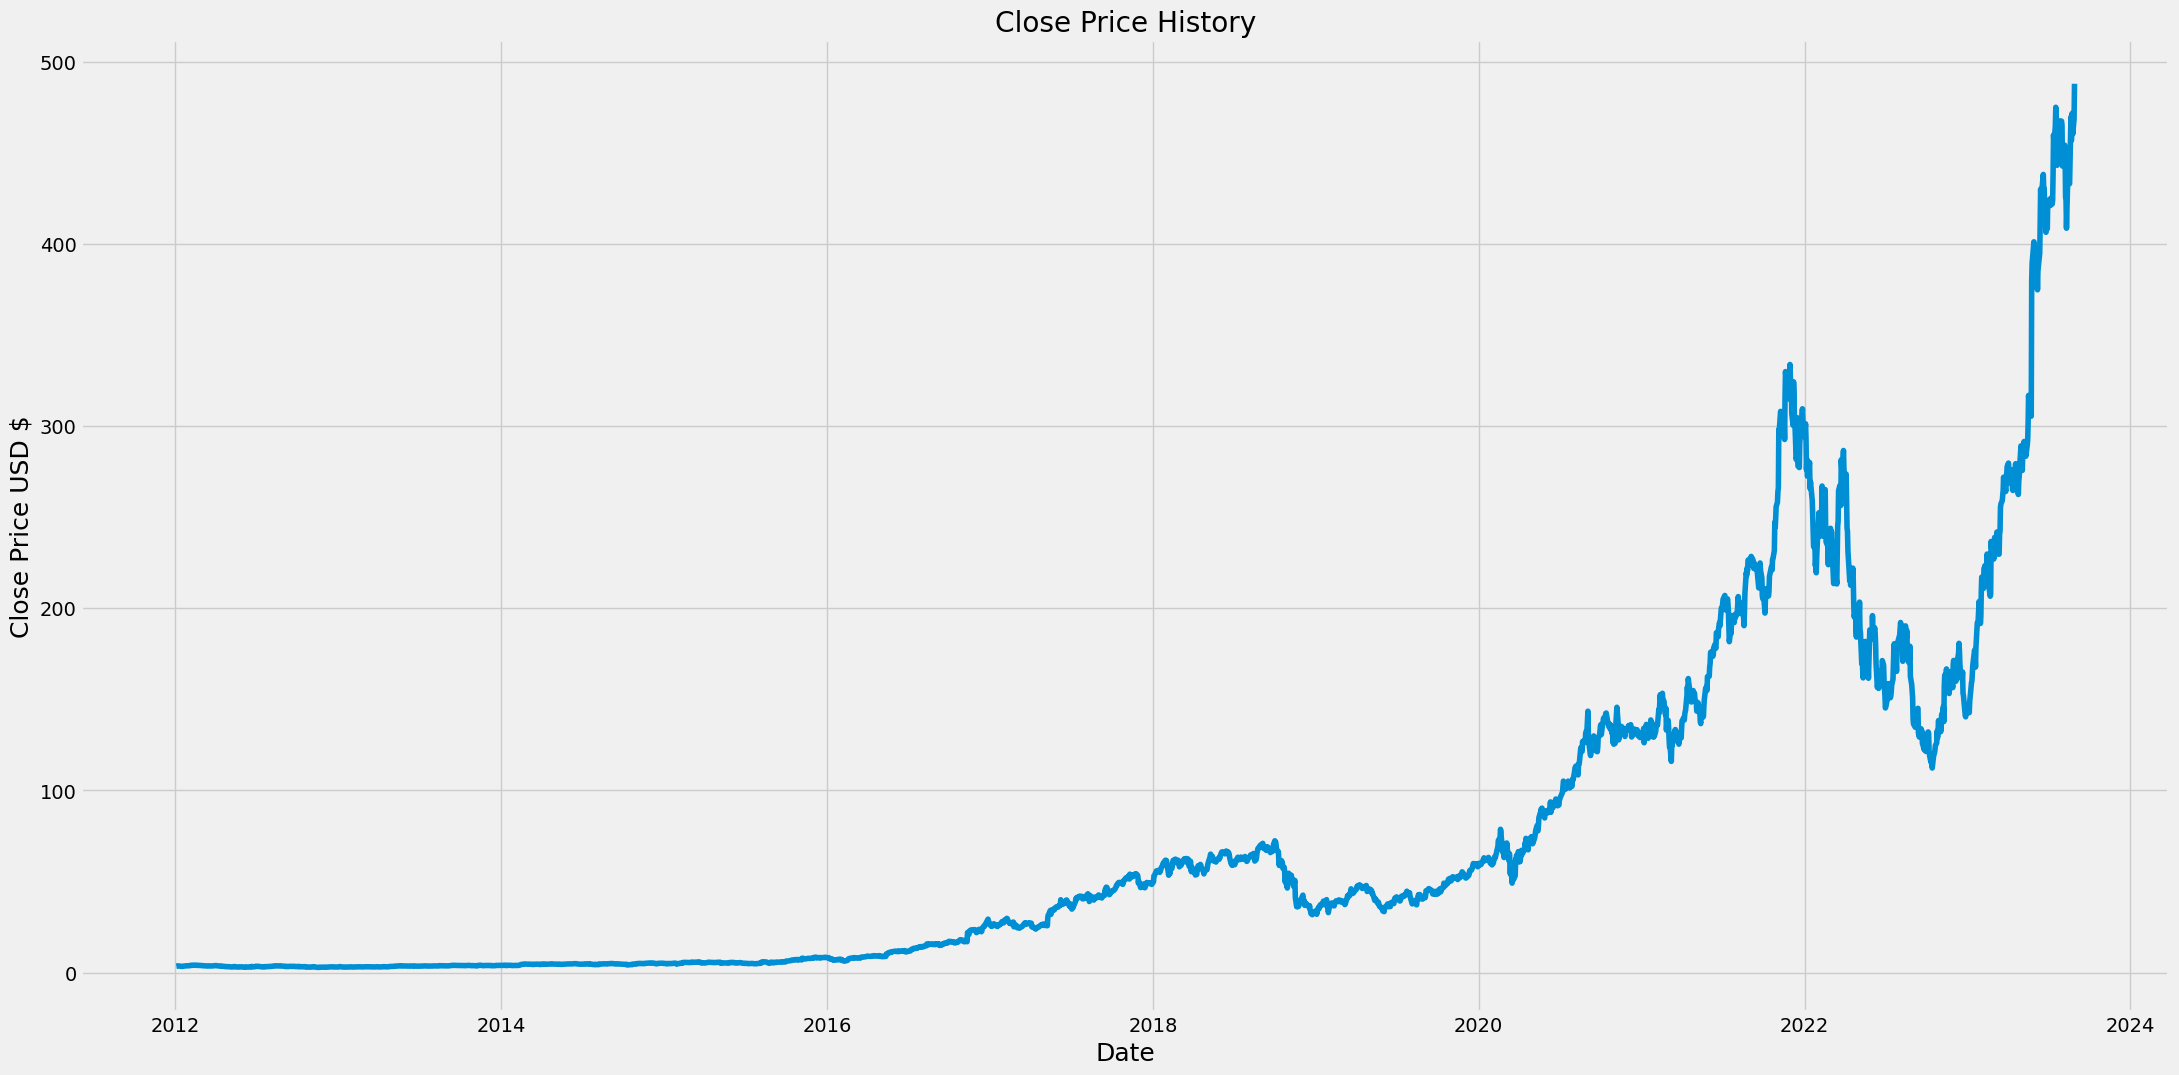

In [4]:
#Visualize the closing price history
plt.figure(figsize=(24,12))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD $', fontsize=18)
plt.show()

In [5]:
data = df.filter(['Close'])
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)
look_back = 60
x_train, y_train = [], []
for i in range(look_back, len(scaled_data)):
  x_train.append(scaled_data[i - look_back:i, 0])
  y_train.append(scaled_data[i, 0])

In [6]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [7]:
from tensorflow.keras.models import load_model

model = load_model('saad_keras_model.h5')

In [8]:
predictions_train = model.predict(x_train)
predictions_train = scaler.inverse_transform(predictions_train)

train_predictions_df = pd.DataFrame()
train_predictions_df['Date'] = df.index[look_back:]
train_predictions_df['Close'] = data.iloc[look_back:]['Close'].values
train_predictions_df['Predictions'] = predictions_train

90/90 [==============================] - 3s 23ms/step


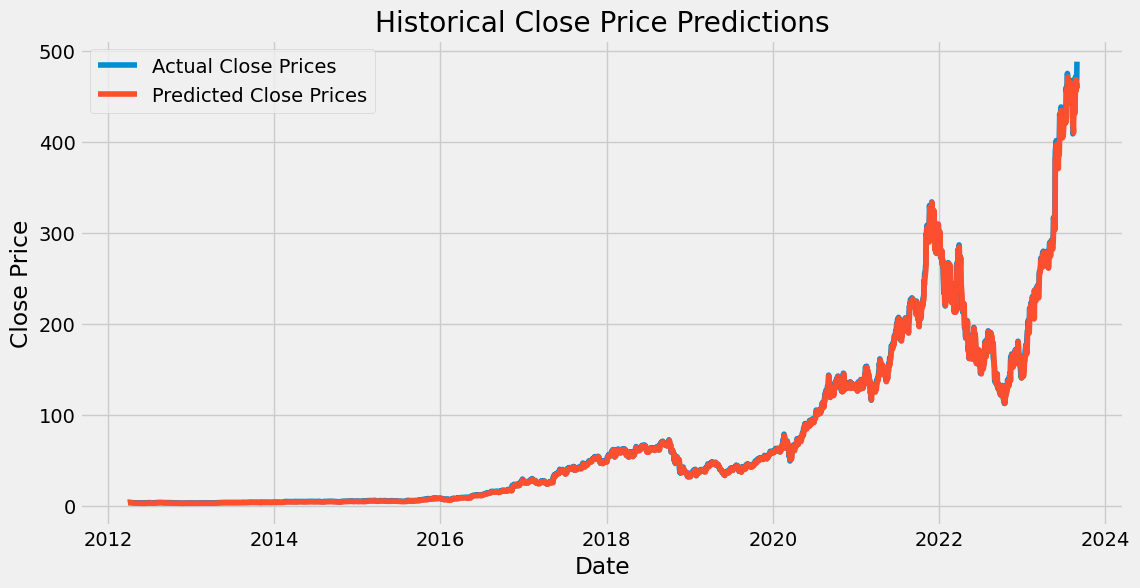

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(train_predictions_df['Date'], train_predictions_df['Close'], label='Actual Close Prices')
plt.plot(train_predictions_df['Date'], train_predictions_df['Predictions'], label='Predicted Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Historical Close Price Predictions')
plt.legend()
plt.show()

In [10]:
# Predict Future Prices
future_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(days=-1), periods=730, freq='D')
future_scaled_data = scaled_data[-look_back:]
future_predictions = []

In [11]:
for i in range(730):
    x_future = future_scaled_data[-look_back:].reshape(1, -1, 1)
    prediction = model.predict(x_future)[0][0]
    prediction = model.predict(x_future)
    future_scaled_data = np.append(future_scaled_data, prediction)
    future_predictions.append(scaler.inverse_transform(prediction)[0][0])

1/1 [==============================] - 0s 42ms/step


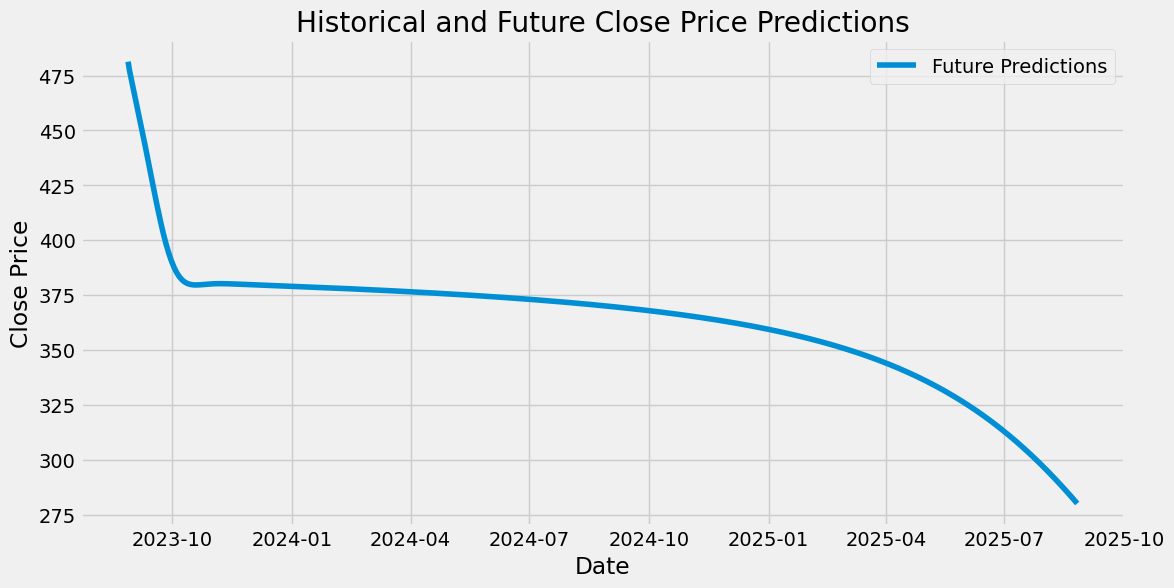

In [12]:
# Create DataFrame for future predictions
future_predictions_df = pd.DataFrame()
future_predictions_df['Date'] = future_dates
future_predictions_df['Predictions'] = future_predictions

# Plot the results
plt.figure(figsize=(12, 6))

plt.plot(future_predictions_df['Date'], future_predictions_df['Predictions'], label='Future Predictions')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Historical and Future Close Price Predictions')
plt.legend()
plt.show()